# Standardizing Data

Dhrumil, Soma and Mark Judge a fake writing competition.



## Setup

Ignore / skip this step

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

This is a Python notebook, but below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load Data

Making some fake data for our fake writing competition.

In [7]:
%%R -w 1000 -o fake_ratings

# Generate some fake data that is normally distributed for Dhrumil in R
library('tidyverse')
library('truncnorm')

# set a random seeed so that we always get the same "random" numbers 
set.seed(42)
mark <- rtruncnorm(    n = 100, a = 0, b = 100, mean = 90, sd = 5 ) %>% sort()
soma <- rtruncnorm(    n = 100, a = 0, b = 100, mean = 70, sd = 10) %>% sort()
dhrumil <- rtruncnorm( n = 100, a = 0, b = 100, mean = 70, sd = 20) %>% sort()

# put those into a long dataframe with user and rating
fake_ratings <- data.frame(mark, soma, dhrumil)

# view the fake data
fake_ratings

        mark     soma  dhrumil
1   75.03455 49.75322 16.00140
2   76.71772 49.99071 27.73600
3   77.79767 52.54944 32.96889
4   77.92896 53.38901 36.74741
5   81.09346 54.05412 37.48767
6   81.18418 54.48455 42.38726
7   81.41496 55.06375 42.46277
8   82.70393 55.29564 44.32796
9   83.05570 55.50993 45.14659
10  83.15859 56.37884 45.96835
11  84.02836 56.63763 45.97556
12  84.34131 57.05998 46.03008
13  84.44606 57.61748 46.98289
14  84.50110 57.75252 48.07688
15  84.78441 59.02886 48.63738
16  85.23238 59.28218 48.91888
17  85.57112 59.43632 49.32253
18  85.69604 59.96791 49.64808
19  85.74546 60.03361 50.57230
20  85.94303 60.07307 51.15257
21  86.07770 60.40830 53.63239
22  86.08081 61.12321 53.75231
23  86.36354 61.63693 55.23118
24  86.36648 61.99718 55.41565
25  86.80003 63.33227 55.88357
26  86.95537 63.86328 56.24806
27  87.17651 64.15891 56.82993
28  87.28586 64.66508 57.08513
29  87.61913 64.87350 58.61387
30  87.84277 64.95783 59.56408
31  87.84765 65.07123 60.45329
32  88.1

## Pivot from wide to long

`fake_ratings` is in wide format. 

Make a new dataframe called `fake_ratings_long` in long format with two columns, `grader` and `rating`. 

This will prove useful when plotting.

In [24]:
%%R
fake_ratings

        mark     soma  dhrumil
1   75.03455 49.75322 16.00140
2   76.71772 49.99071 27.73600
3   77.79767 52.54944 32.96889
4   77.92896 53.38901 36.74741
5   81.09346 54.05412 37.48767
6   81.18418 54.48455 42.38726
7   81.41496 55.06375 42.46277
8   82.70393 55.29564 44.32796
9   83.05570 55.50993 45.14659
10  83.15859 56.37884 45.96835
11  84.02836 56.63763 45.97556
12  84.34131 57.05998 46.03008
13  84.44606 57.61748 46.98289
14  84.50110 57.75252 48.07688
15  84.78441 59.02886 48.63738
16  85.23238 59.28218 48.91888
17  85.57112 59.43632 49.32253
18  85.69604 59.96791 49.64808
19  85.74546 60.03361 50.57230
20  85.94303 60.07307 51.15257
21  86.07770 60.40830 53.63239
22  86.08081 61.12321 53.75231
23  86.36354 61.63693 55.23118
24  86.36648 61.99718 55.41565
25  86.80003 63.33227 55.88357
26  86.95537 63.86328 56.24806
27  87.17651 64.15891 56.82993
28  87.28586 64.66508 57.08513
29  87.61913 64.87350 58.61387
30  87.84277 64.95783 59.56408
31  87.84765 65.07123 60.45329
32  88.1

In [23]:
%%R
fake_ratings %>% pivot_longer(cols = everything(), names_to = "grader", values_to = "rating")

# A tibble: 300 × 2
   grader  rating
   <chr>    <dbl>
 1 mark      75.0
 2 soma      49.8
 3 dhrumil   16.0
 4 mark      76.7
 5 soma      50.0
 6 dhrumil   27.7
 7 mark      77.8
 8 soma      52.5
 9 dhrumil   33.0
10 mark      77.9
# ℹ 290 more rows
# ℹ Use `print(n = ...)` to see more rows


In [13]:
%%R 

fake_ratings_long <- fake_ratings %>% pivot_longer(cols = everything(), names_to = "grader", values_to = "rating")

## Plot the distributions

* Plot the distributions for each grader in a way that lets you compare them. You can again use dotplots (`geom_point`) and boxplots (`geom_boxplot`).
* If you want somethig new try `geom_density` (a close cousin of our friend `geom_histogram(position="identity")`. 
* Don't forget to set `alpha` to something lower than 1 so that you can see when points or bars overlap.

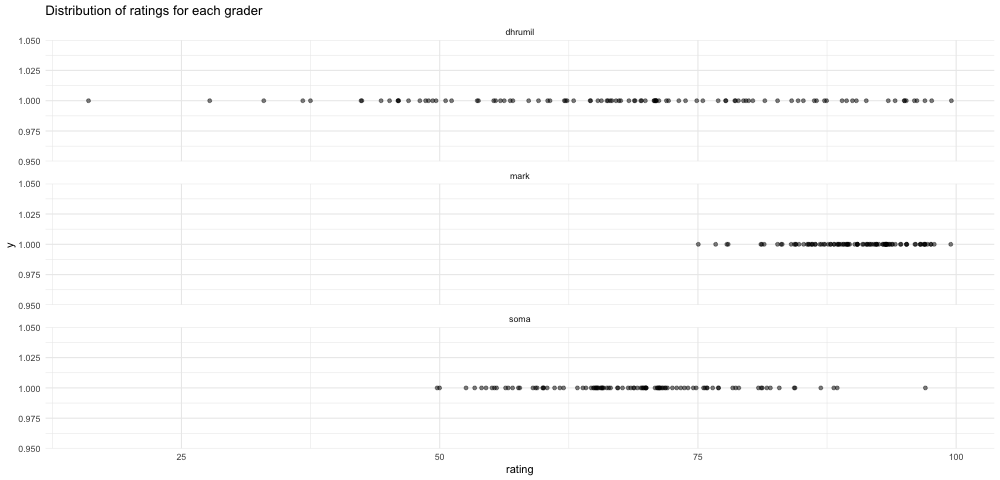

In [25]:
%%R -w 1000 -o fake_ratings

# plot the distributions for each grader
fake_ratings_long %>% ggplot(aes(x = rating, y=1)) + 
    geom_point(alpha = 0.5) +
    theme_minimal() +
    facet_wrap(~grader, ncol=1) +
    labs(title = "Distribution of ratings for each grader")

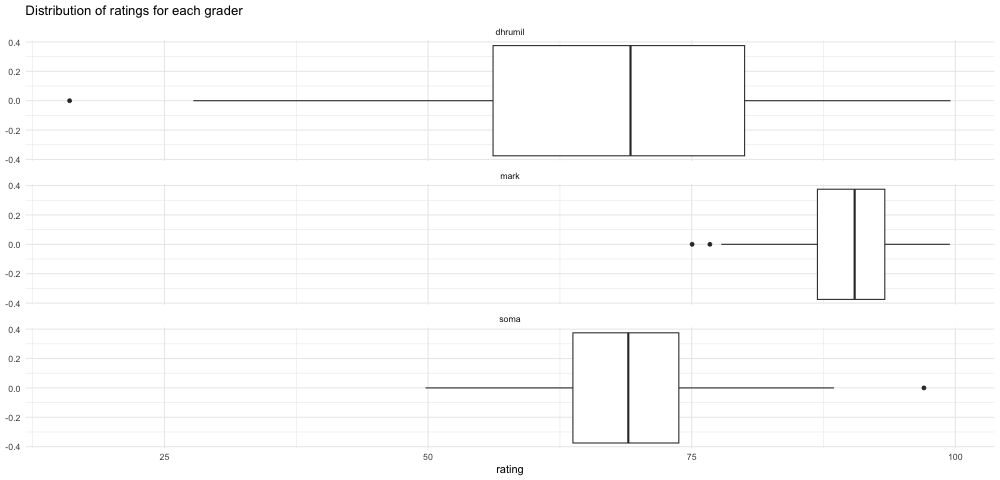

In [26]:
%%R -w 1000 -o fake_ratings

# plot the distributions for each grader as a boxplot
fake_ratings_long %>% ggplot(aes(x = rating)) + 
    geom_boxplot() +
    theme_minimal() +
    facet_wrap(~grader, ncol=1) +
    labs(title = "Distribution of ratings for each grader")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


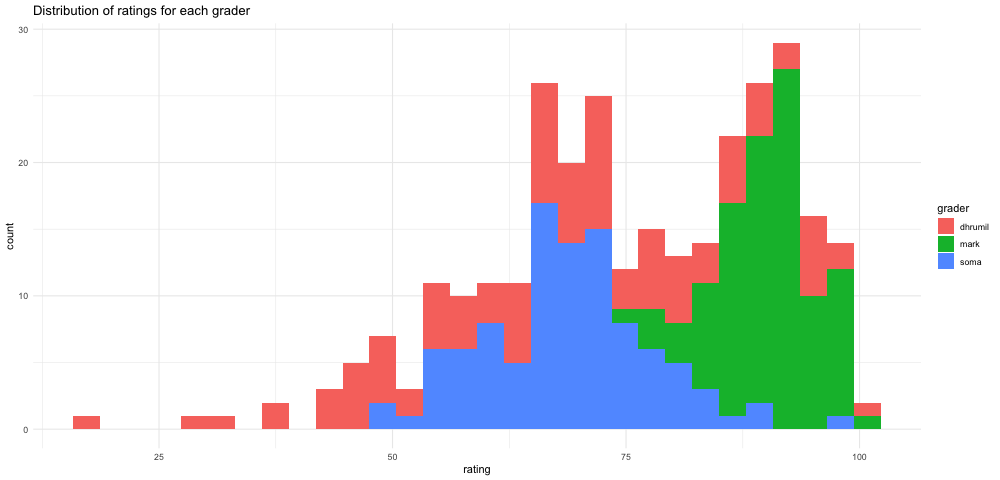

In [27]:
%%R -w 1000 -o fake_ratings

# plot the distributions for each grader as a boxplot
fake_ratings_long %>% ggplot(aes(x = rating, fill = grader)) + 
    geom_histogram() +
    theme_minimal() +
    labs(title = "Distribution of ratings for each grader")

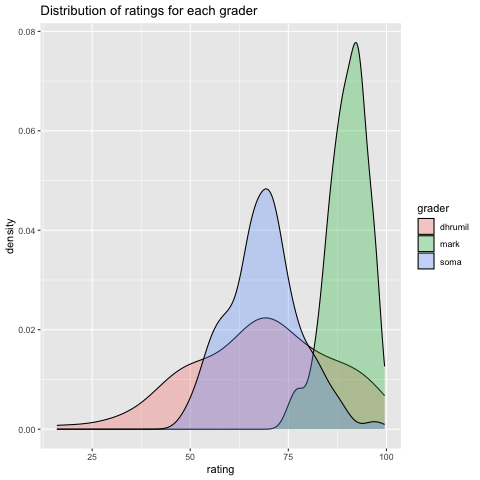

In [30]:
%%R

ggplot(fake_ratings_long) + aes(x = rating, fill = grader) + geom_density(alpha =0.3) + labs(title = "Distribution of ratings for each grader")

In [22]:
%%R 

# get the summary statistics for each grader
fake_ratings_long %>% group_by(grader) %>% summarise(
    mean = mean(rating),
    median = median(rating),
    sd = sd(rating),
    min = min(rating),
    max = max(rating)
)

# A tibble: 3 × 6
  grader   mean median    sd   min   max
  <chr>   <dbl>  <dbl> <dbl> <dbl> <dbl>
1 dhrumil  68.3   69.2 17.5   16.0  99.5
2 mark     90.1   90.4  5.04  75.0  99.5
3 soma     68.7   69.0  9.08  49.8  97.0


## Standardize

Make a new dataframe called `fake_ratings_standardized` containing standardized ratings for each grader. 

Calculating standardized ratings is another way to say "calcuate a z-score for each rating".

Remember, you will want to use `mutate()` in R to make new columns for each candidate's z scores.

A z-score is the number of standard deviations away from the mean. So the formula would be:

$Z = \frac{X - \bar{X}}{s}$

where
- $Z$ is the Z-score,
- $X$ is the value of the element,
- $\bar{X}$ is the mean of the population, and
- ${s}$ is the standard deviation of the sample.








In [43]:
%%R #-o fake_ratings_standardized

# standardize the ratings for each grader
fake_ratings_standardized <- fake_ratings %>% 
    mutate(
        mark = (mark - mean(mark))/sd(mark),
        soma = (soma - mean(soma))/sd(soma),
        dhrumil = (dhrumil - mean(dhrumil))/sd(dhrumil)
    )

In [45]:
%%R 

# plot the standardized ratings (you may need to convert your dataframe to long format depending on your plot type)
fake_ratings_standardized %>% pivot_longer(cols = everything(), names_to = "grader", values_to = "rating") %>%
    ggplot( aes(x = rating, fill = grader) + geom_density(alpha =0.3))

Error in `ggplot()`:
! `mapping` should be created with `aes()`.
✖ You've supplied a <NULL> object
Run `rlang::last_trace()` to see where the error occurred.
Error in print(..., self = self) : unused argument (useS4 = FALSE)
Error in ggplot(., aes(x = rating, fill = grader) + geom_density(alpha = 0.3)) : 
  
✖ You've supplied a <NULL> object


RInterpreterError: Failed to parse and evaluate line '\n# plot the standardized ratings (you may need to convert your dataframe to long format depending on your plot type)\nfake_ratings_standardized %>% pivot_longer(cols = everything(), names_to = "grader", values_to = "rating") %>%\n    ggplot( aes(x = rating, fill = grader) + geom_density(alpha =0.3))\n'.
R error message: "Error in ggplot(., aes(x = rating, fill = grader) + geom_density(alpha = 0.3)) : \n  \n✖ You've supplied a <NULL> object"
R stdout:
Error in print(..., self = self) : unused argument (useS4 = FALSE)

In [ ]:
%%R 

# show the standardized summary stats

## Conduct Hypothesis Tests

In [ ]:
%%R 

# t test for pair 1

In [ ]:
%%R 

# t test for pair 2

In [ ]:
%%R 

# t test for pair 3